In [4]:
import librosa
import pandas as pd
import numpy as np

In [5]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True) # mount to google drive

Mounted at /content/gdrive


In [6]:
audio_files = pd.DataFrame(pd.read_excel("/content/gdrive/MyDrive/222 proj/data.xlsx")) # audio
audio_files

,file_name,assertiveness,enthusiasim,clairity,engagement
0,Aaron_Beverly.wav,8,6,9,9
1,b1.wav,3,3,5,2
2,b2.wav,6,7,5,7
3,champ.wav,9,10,9,10
4,harvard.wav,8,7,8,8
5,miss_teen.wav,6,6,2,4
6,obama_2020.wav,8,7,9,8
7,obama.wav,10,9,9,9
8,reporter.wav,7,5,3,4
9,socks.wav,4,4,2,3


In [7]:
def preprocess_data(file_path):
  audio, sr = librosa.load(file_path, sr=16000) #16000 is recommended sample rate for
  mfccs_scaled = np.mean(librosa.feature.mfcc(y=audio, sr = 16000, n_mfcc=1000).T, axis=0)
  return mfccs_scaled

In [8]:
import tensorflow as tf
mfcc_features_list = [] # list of spectrograms
for file_name in audio_files["file_name"]:
  print(file_name)
  audio = preprocess_data("/content/gdrive/MyDrive/222 proj/audio_clips/" + file_name)
  mfcc_features_list.append(audio) # append spectrogram audio data to audios. After the loop, audios will have the audio information of all the files as a spectrograms in different rows
audio_files.insert(0, "mfccs", mfcc_features_list) # inserting new audio column to audio_files


Aaron_Beverly.wav
b1.wav
b2.wav
champ.wav
harvard.wav
miss_teen.wav
obama_2020.wav
obama.wav
reporter.wav
socks.wav
Susan_Lozier_TED.wav
toast.wav
trudeau.wav
trudeau.wav
Woman.wav
the-price-of-shame-monica-lewinsky-ted_bPeL2a7k.wav
steve-jobs-stanford-commencement-speech-2005_glkoTZ98.wav
public-speaking-example-3_Jso631k6.wav
public-speaking-example-1_RFlXC5WZ.wav
Public Speaking Example 4.wav
president-nelson-mandela-inauguration-speech-may-10-1994_ebVx0SSO.wav
michelle-yeoh-addresses-the-harvard-law-school-class-of-2023_Mm1N9Uok.wav
ego-and-math-3blue1brown-stanford-math-department-commencement-speech-2023_8tAb7ueJ.wav
boy-gives-speech_c1bUFPNr.wav
a-meditation-on-rumi-and-the-power-of-poetry-leili-anvar-ted_hUSzceXH.wav
trimmed_speech1.wav
trimmed_speech2.wav
trimmed_speech3.wav
trimmed_speech4.wav
trimmed_speech5.wav
trimmed_speech6.wav


In [ ]:
audio_files.head() # check what audio_files looks like

,mfccs,file_name,assertiveness,enthusiasim,clairity,engagement
0,"[-355.01233, 80.249466, -18.828096, 16.806034,...",Aaron_Beverly.wav,8,6,9,9
1,"[-176.20737, 65.394585, -16.727531, 17.33147, ...",b1.wav,3,3,5,2
2,"[-377.40625, 90.72757, 5.678156, 7.091702, -3....",b2.wav,6,7,5,7
3,"[-236.3935, 67.31595, -19.487085, 20.926512, -...",champ.wav,9,10,9,10
4,"[-306.0925, 125.22217, -57.953915, 22.362713, ...",harvard.wav,8,7,8,8


<Axes: xlabel='enthusiasim', ylabel='Count'>

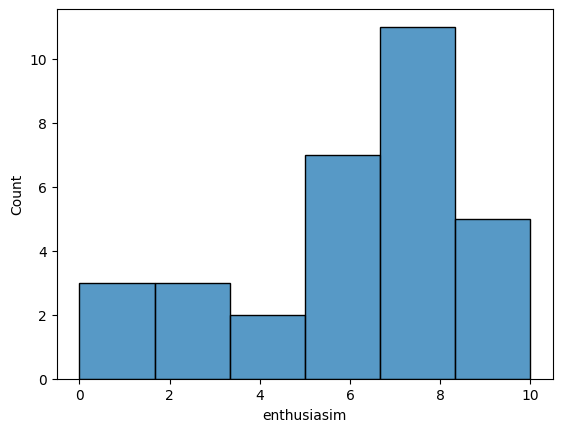

In [9]:
import seaborn
from scipy import stats

quality = "enthusiasim" # THIS IS WHERE TO CHOOSE WHICH QUALITY WE WANT TO TRAIN THE MODEL ON
seaborn.histplot(data=audio_files[quality])


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(audio_files['mfccs'], audio_files[quality], test_size=0.25, random_state=48) # split into 80% 20% training testing datasets


In [ ]:
y_train

12     7
18     6
3     10
11    10
10     7
13     5
15     8
2      7
14     7
6      7
19     1
16     3
4      7
17    10
0      6
Name: enthusiasim, dtype: int64

In [11]:
from tensorflow.python.framework import ops
# convert training and testing data lists into np array
x_train = np.asarray(x_train)
x_test = np.asarray(x_test)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)
# convert to tensor
x_train = np.array([tensor for tensor in x_train])
x_test = np.array([tensor for tensor in x_test])

In [12]:
x_train

array([[-2.31108292e+02,  8.73163834e+01, -2.39999809e+01, ...,
         1.36617705e-01,  9.59681422e-02,  1.28089175e-01],
       [-3.43350861e+02,  7.73025894e+01, -3.21493721e+01, ...,
         4.65764612e-01,  6.17544204e-02, -3.59438300e-01],
       [-2.20075836e+02,  9.98268738e+01,  1.49030304e+01, ...,
         1.18775509e-01,  2.40192860e-02, -1.43464819e-01],
       ...,
       [-2.90033722e+02,  8.22706909e+01, -6.71874046e+00, ...,
         6.13703132e-01,  3.21277231e-01,  4.75857556e-02],
       [-3.26815765e+02,  8.95835342e+01,  1.29874027e+00, ...,
        -1.15541525e-01,  5.81549406e-01,  5.45862466e-02],
       [-3.55012329e+02,  8.02494659e+01, -1.88280964e+01, ...,
         1.46538168e-02, -1.50094911e-01,  2.49945149e-02]], dtype=float32)

In [57]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D

# create model
model = Sequential()
model.add(Dense(19, activation='relu'))
model.add(Dense(15, activation='relu'))

model.add(Dense(1, activation='relu'))


In [56]:
model.compile(loss='mse', optimizer='adam', metrics=['mae', 'mse'])

# train the model
history = model.fit(x_train, y_train, epochs = 120, validation_data=[x_test, y_test])

Epoch 1/120
1/1 [==============================] - 1s 1s/step - loss: 22.2509 - mae: 3.6678 - mse: 22.2509 - val_loss: 14.5971 - val_mae: 3.1786 - val_mse: 14.5971
Epoch 2/120
1/1 [==============================] - 0s 50ms/step - loss: 16.9588 - mae: 3.1962 - mse: 16.9588 - val_loss: 12.4265 - val_mae: 2.9812 - val_mse: 12.4265
Epoch 3/120
1/1 [==============================] - 0s 49ms/step - loss: 13.0548 - mae: 2.8517 - mse: 13.0548 - val_loss: 10.9641 - val_mae: 2.7944 - val_mse: 10.9641
Epoch 4/120
1/1 [==============================] - 0s 67ms/step - loss: 10.4746 - mae: 2.5927 - mse: 10.4746 - val_loss: 10.0923 - val_mae: 2.5847 - val_mse: 10.0923
Epoch 5/120
1/1 [==============================] - 0s 50ms/step - loss: 9.0825 - mae: 2.4408 - mse: 9.0825 - val_loss: 9.7470 - val_mae: 2.5128 - val_mse: 9.7470
Epoch 6/120
1/1 [==============================] - 0s 65ms/step - loss: 8.4264 - mae: 2.3731 - mse: 8.4264 - val_loss: 9.7824 - val_mae: 2.4980 - val_mse: 9.7824
Epoch 7/120
1/

In [47]:
y_pred = model.predict(x_test)

1/1 [==============================] - 0s 72ms/step


In [48]:
from sklearn.metrics import r2_score
print(r2_score(y_test, y_pred))

0.15315729959730806


In [ ]:
for y in range(0, len(y_pred)):
  print("Actual Enthusiasm", y_test[y], "Predicted enthusiasm:", y_pred[y][0])

Actual Enthusiasm 3 Predicted enthusiasm: 3.8643587
Actual Enthusiasm 4 Predicted enthusiasm: 3.6078587
Actual Enthusiasm 6 Predicted enthusiasm: 5.272105
Actual Enthusiasm 9 Predicted enthusiasm: 10.404229
Actual Enthusiasm 5 Predicted enthusiasm: 0.31234646


In [ ]:
from scipy.stats import spearmanr
coef, p = spearmanr(y_test, y_pred)
print(coef)

nan


/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:5445: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(warn_msg))


In [ ]:
!mkdir saved_model
model.save("saved_models/" + quality) # create ability to save model for any quality

In [ ]:
!zip -r "saved_models.zip" "saved_models"

  adding: saved_models/ (stored 0%)
  adding: saved_models/enthusiasim/ (stored 0%)
  adding: saved_models/enthusiasim/fingerprint.pb (stored 0%)
  adding: saved_models/enthusiasim/variables/ (stored 0%)
  adding: saved_models/enthusiasim/variables/variables.data-00000-of-00001 (deflated 8%)
  adding: saved_models/enthusiasim/variables/variables.index (deflated 64%)
  adding: saved_models/enthusiasim/saved_model.pb (deflated 87%)
  adding: saved_models/enthusiasim/keras_metadata.pb (deflated 90%)
  adding: saved_models/enthusiasim/assets/ (stored 0%)


In [ ]:
# after saving all different models...

In [ ]:
def test_speech(file_name, characteristic):
  if characteristic not in ("assertiveness", "enthusiasm", "clarity", "engagement"):
    print("Error: test_speech called with bad characteristic. Please use one of the following: assertiveness, enthusiasm, clarity, engagement")
    return -1

  model = tf.keras.models.load_model('saved_models/' + quality) # load in saved model

  spectrogram = get_spectrogram("/content/gdrive/MyDrive/222 proj/audio_clips/" + file_name)
  spectrogram = spectrogram[0:15000] # cut to 30 seconds
  return model.predict(spectrogram) # return prediction